In [1]:
import numpy as np
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
test_set = torchvision.datasets.ImageFolder('dataset/test',transform=trans)
test_loader = DataLoader(test_set)

model = torch.load('best_model.pt')
binary_model = torch.load('best_model_binary.pt')

model.eval()
binary_model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
num_correct = 0
all_result = []

for x, y in tqdm(test_loader):
    x = x.to(device)
    y = y.to(device)
    
    is_trash = torch.argmax(binary_model(x), 1)
    output = model(x)
    prediction = torch.argmax(output, 1)
    if is_trash[0] == 1:
        # print(torch.max(torch.softmax(output, 1)), test_set.classes[prediction[0]])
        prediction[0] = 5
    
    if prediction == y:
        num_correct += 1
    
    all_result.append([y.cpu().detach().numpy()[0], prediction.cpu().detach().numpy()[0]])

accuracy = num_correct / len(test_loader)


 50%|█████     | 217/431 [00:04<00:01, 113.49it/s]

tensor(0.9655, device='cuda:0', grad_fn=<MaxBackward1>) metal


 59%|█████▊    | 253/431 [00:04<00:01, 113.16it/s]

tensor(0.9841, device='cuda:0', grad_fn=<MaxBackward1>) paper
tensor(0.5604, device='cuda:0', grad_fn=<MaxBackward1>) paper


 64%|██████▍   | 277/431 [00:05<00:01, 112.11it/s]

tensor(0.5083, device='cuda:0', grad_fn=<MaxBackward1>) paper


 73%|███████▎  | 314/431 [00:05<00:01, 114.40it/s]

tensor(0.9936, device='cuda:0', grad_fn=<MaxBackward1>) paper
tensor(0.9562, device='cuda:0', grad_fn=<MaxBackward1>) paper


 78%|███████▊  | 338/431 [00:05<00:00, 112.90it/s]

tensor(0.4442, device='cuda:0', grad_fn=<MaxBackward1>) plastic


 97%|█████████▋| 418/431 [00:06<00:00, 91.58it/s] 

tensor(0.9176, device='cuda:0', grad_fn=<MaxBackward1>) plastic
tensor(0.7125, device='cuda:0', grad_fn=<MaxBackward1>) cardboard
tensor(0.4054, device='cuda:0', grad_fn=<MaxBackward1>) paper
tensor(0.8528, device='cuda:0', grad_fn=<MaxBackward1>) metal
tensor(0.6294, device='cuda:0', grad_fn=<MaxBackward1>) plastic
tensor(0.9213, device='cuda:0', grad_fn=<MaxBackward1>) plastic
tensor(0.9993, device='cuda:0', grad_fn=<MaxBackward1>) plastic
tensor(0.9658, device='cuda:0', grad_fn=<MaxBackward1>) plastic
tensor(0.9838, device='cuda:0', grad_fn=<MaxBackward1>) metal
tensor(0.8166, device='cuda:0', grad_fn=<MaxBackward1>) metal
tensor(0.9992, device='cuda:0', grad_fn=<MaxBackward1>) paper
tensor(0.7143, device='cuda:0', grad_fn=<MaxBackward1>) plastic
tensor(0.8803, device='cuda:0', grad_fn=<MaxBackward1>) metal
tensor(0.9828, device='cuda:0', grad_fn=<MaxBackward1>) plastic
tensor(0.9769, device='cuda:0', grad_fn=<MaxBackward1>) metal


100%|██████████| 431/431 [00:06<00:00, 64.60it/s]

tensor(0.9989, device='cuda:0', grad_fn=<MaxBackward1>) metal
tensor(0.8053, device='cuda:0', grad_fn=<MaxBackward1>) metal
tensor(0.7277, device='cuda:0', grad_fn=<MaxBackward1>) plastic
tensor(0.9736, device='cuda:0', grad_fn=<MaxBackward1>) plastic
tensor(0.5952, device='cuda:0', grad_fn=<MaxBackward1>) metal
tensor(0.7558, device='cuda:0', grad_fn=<MaxBackward1>) metal
tensor(0.8276, device='cuda:0', grad_fn=<MaxBackward1>) plastic
tensor(0.8320, device='cuda:0', grad_fn=<MaxBackward1>) paper
tensor(0.9323, device='cuda:0', grad_fn=<MaxBackward1>) metal
tensor(0.9927, device='cuda:0', grad_fn=<MaxBackward1>) metal


Overall Accuracy: 0.8979118329466357
--------------------------------
cardboard Accuracy: 0.8857142857142857
glass Accuracy: 0.9024390243902439
metal Accuracy: 0.9411764705882353
paper Accuracy: 0.8888888888888888
plastic Accuracy: 0.8918918918918919
trash Accuracy: 0.8620689655172413


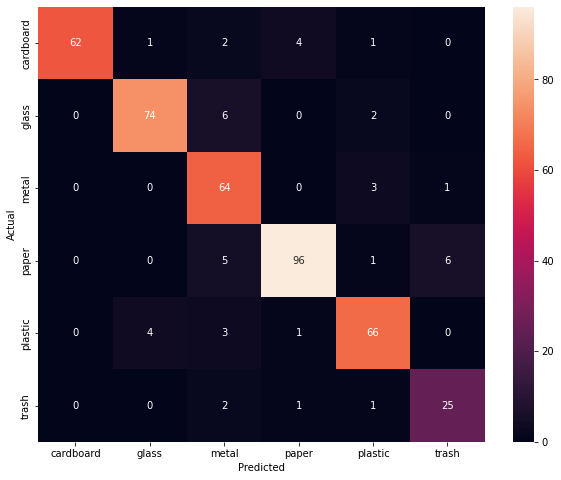

In [4]:
num_classes = len(test_set.classes)
cmt = np.zeros((num_classes, num_classes), np.int64)

for actual, predicted in all_result:
    cmt[actual, predicted] += 1

plt.figure(figsize=(10,8))
sns.heatmap(cmt, xticklabels=test_set.classes, yticklabels=test_set.classes, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('Overall Accuracy:', accuracy)
print('--------------------------------')
for i in range(num_classes):
    per_class_acc = cmt[i, i] / cmt[i].sum()
    print(f"{test_set.classes[i]} Accuracy:", per_class_acc)
